<a href="https://colab.research.google.com/github/etwalsaado/Practice/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install opencv-python-headless

In [21]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import matplotlib.pyplot as plt

In [22]:
uploaded = files.upload()

Saving A-Comprehensive-Guide-to-Google-Colab-Features-Usage-and-Best-Practices.webp to A-Comprehensive-Guide-to-Google-Colab-Features-Usage-and-Best-Practices (1).webp


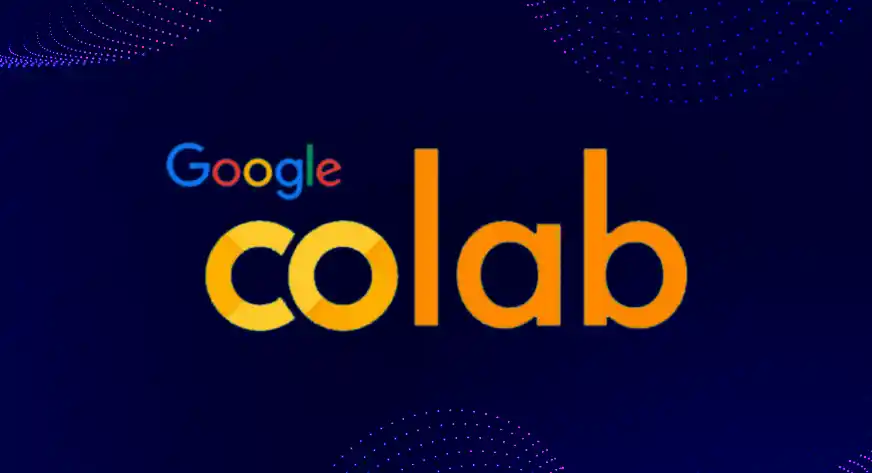

In [23]:
img_name = next(iter(uploaded.keys()))
img = cv2.imread(img_name)
cv2_imshow(img)

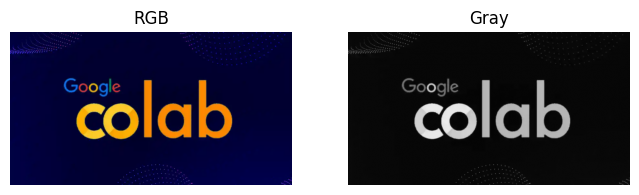

In [24]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('RGB')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')
plt.axis('off')
plt.show()

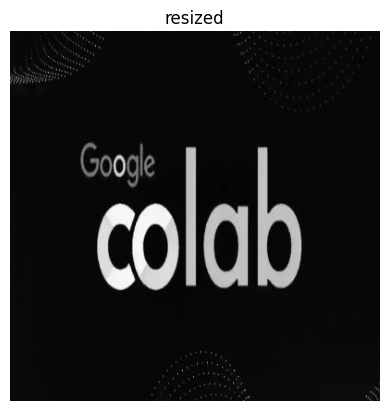

In [25]:
resized = cv2.resize(img_gray, (400,400))
plt.imshow(resized, cmap='gray')
plt.title('resized')
plt.axis('off')
plt.show()

In [26]:
h, w = img_gray.shape
print(h, w)

473 872


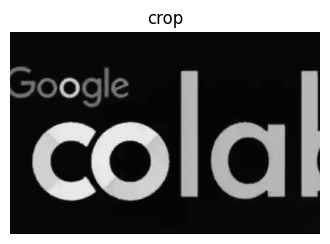

In [27]:
crop = img_gray[int(h*0.2):int(h*0.8), int(w*0.2):int(w*0.7)]
plt.figure(figsize=(4,4))
plt.imshow(crop, cmap='gray')
plt.title('crop')
plt.axis('off')
plt.show()

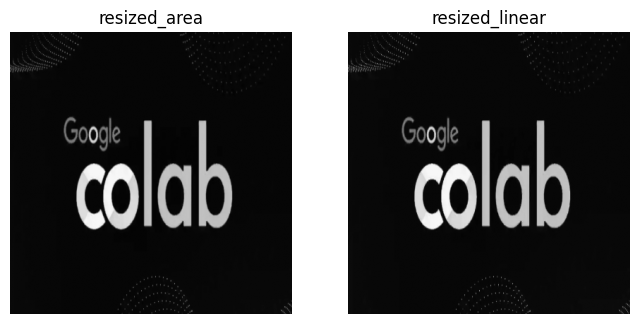

In [28]:
resized_area = cv2.resize(img_gray, (400,400), interpolation=cv2.INTER_AREA)
resized_linear = cv2.resize(img_gray, (400,400), interpolation=cv2.INTER_LINEAR)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(resized_area, cmap='gray')
plt.title('resized_area')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(resized_linear, cmap='gray')
plt.title('resized_linear')
plt.axis('off')
plt.show()

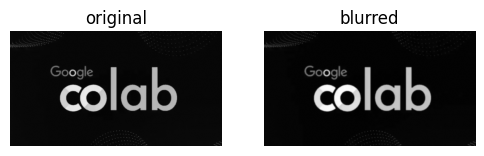

In [29]:
blurred = cv2.GaussianBlur(img_gray, (5,5), 0)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('original')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(blurred, cmap='gray')
plt.title('blurred')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'threshold')

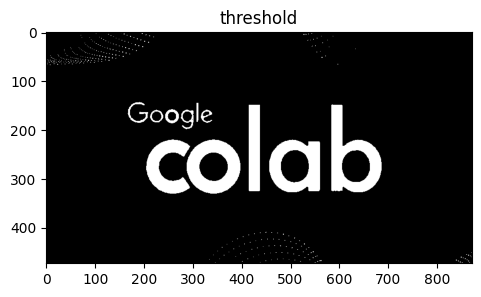

In [30]:
ret, th = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(6,3))
plt.imshow(th, cmap='gray')
plt.title('threshold')

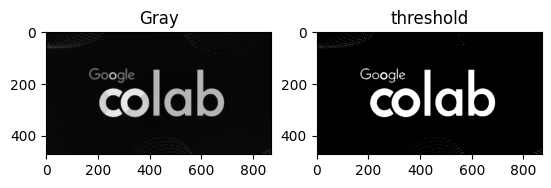

In [31]:
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')
plt.subplot(1,2,2)
plt.imshow(th, cmap='gray')
plt.title('threshold')
plt.show()

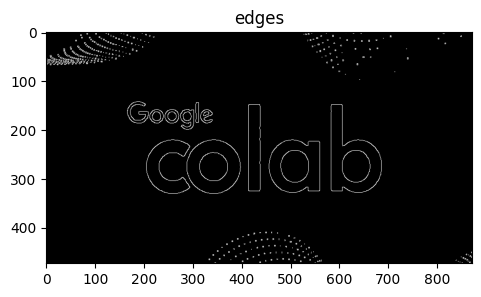

In [32]:
edges = cv2.Canny(img_gray, 100, 200)
plt.figure(figsize=(6,3))
plt.imshow(edges, cmap='gray')
plt.title('edges')
plt.show()

323


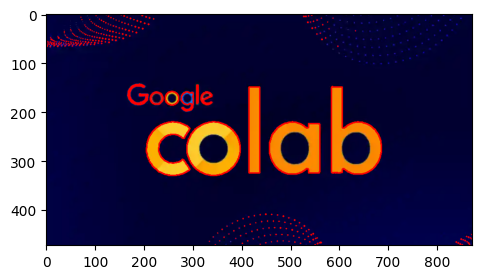

In [33]:
contours, _ = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_cont = img_rgb.copy()
cv2.drawContours(img_cont, contours, -1, (255,0,0), 2)
plt.figure(figsize=(6,3))
plt.imshow(img_cont)
print(len(contours))


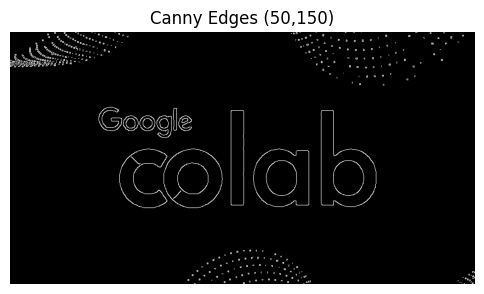

In [37]:
edges = cv2.Canny(img_gray, 50,150)
plt.figure(figsize=(6,4))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges (50,150)')
plt.axis('off')
plt.show()

In [38]:
contours , _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

403


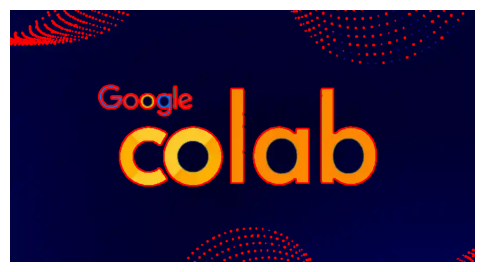

In [39]:
img_cont = img_rgb.copy()
cv2.drawContours(img_cont, contours, -1, (255,0,0), 2)
plt.figure(figsize=(6,4))
plt.imshow(img_cont)
plt.axis('off')
plt.show()

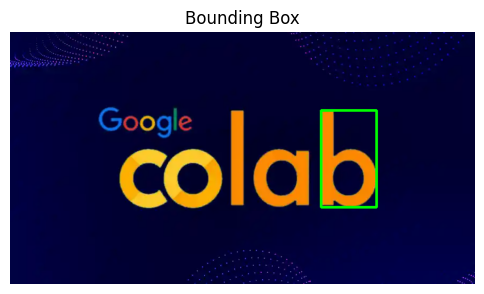

In [43]:
largest_contour = max(contours, key=cv2.contourArea)
x, y, w, h = cv2.boundingRect(largest_contour)
boxed = img_rgb.copy()
cv2.rectangle(boxed, (x,y), (x+w, y+h), (0,255,0), 3)
plt.figure(figsize=(6,4))
plt.imshow(boxed)
plt.title('Bounding Box')
plt.axis('off')
plt.show()